## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
from google.colab import drive

In [285]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Computer_Vision_2/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/labels.csv.zip', 'r') as z:
  z.extractall()

In [291]:
import cv2
import os
os.chdir(project_path)
os.listdir()

['labels.csv',
 'sample_submission.csv',
 'test.zip',
 'train.zip',
 'train',
 'test']

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd
import numpy as np
from glob import glob

In [0]:
df_train = pd.read_csv('labels.csv')
df_test = pd.read_csv('sample_submission.csv')
train_files = glob('train/*.jpg')
test_files = glob('test/*.jpg')

In [294]:
df_train.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


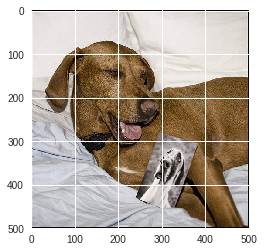

In [295]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.imshow(plt.imread(train_files[100]))

### Print the count of each category of Dogs given in the dataset



In [296]:
breed_count = df_train['breed'].value_counts()
print (breed_count)
print (breed_count.shape)

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
pomeranian                        111
great_pyrenees                    111
basenji                           110
samoyed                           109
tibetan_terrier                   107
airedale                          107
leonberg                          106
cairn                             106
beagle                            105
japanese_spaniel                  105
australian_terrier                102
blenheim_spaniel                  102
miniature_pinscher                102
irish_wolfhound                   101
lakeland_terrier                   99
saluki                             99
papillon                           96
norwegian_elkhound                 95
whippet                            95
siberian_husky                     95
pug         

### Get one-hot encodings of labels

In [0]:
targets = pd.Series(df_train['breed'])
one_hot = pd.get_dummies(targets, sparse = True)
one_hot_labels = np.asarray(one_hot)

In [298]:
one_hot.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [299]:
one_hot_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows=128
img_cols=128
num_channel=1

In [0]:
from tqdm import tqdm
x_feature=[]
y_feature=[]


In [302]:
i = 0 # initialisation
for f, img in tqdm(df_train.values): # f for format ,jpg
    train_img = cv2.imread('./train/{}.jpg'.format(f),0)
    label = one_hot_labels[i]
    train_img_resize = cv2.resize(train_img, (img_rows, img_cols)) 
    x_feature.append(train_img_resize)
    y_feature.append(img)
    i += 1

100%|██████████| 10222/10222 [01:10<00:00, 145.91it/s]


In [303]:
y_feature[0]

'boston_bull'

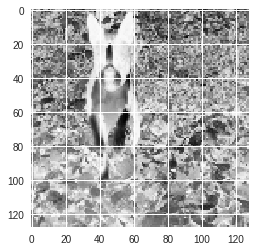

In [304]:
plt.imshow(x_feature[0])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [305]:
x_train_data = np.array(x_feature, np.float32) / 255.   # /= 255 for normolisation
print (x_train_data.shape)
x_train_data = np.expand_dims(x_train_data, axis = 3)
print (x_train_data.shape)

(10222, 128, 128)
(10222, 128, 128, 1)


In [306]:
y_train_data = pd.get_dummies(y_feature,breed_count[0])
print (y_train_data.shape)

(10222, 120)


### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [307]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_data, y_train_data, test_size=0.2, random_state=2)
print (x_train.shape)
print (x_val.shape)

(8177, 128, 128, 1)
(2045, 128, 128, 1)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img=df_test['id']

Run the below code to load the test image files in x_test_feature

In [309]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [01:08<00:00, 150.97it/s]


Normalize the test data and convert it into 4 dimensions

In [310]:
x_test_data = np.array(x_test_feature, np.float32) / 255. 
print (x_test_data.shape)
x_test_data = np.expand_dims(x_test_data, axis = 3)
print (x_test_data.shape)

(10357, 128, 128)
(10357, 128, 128, 1)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from keras.models import Sequential  # initial NN
from keras.layers import Dense, Dropout # construct each layer
from keras.layers import Convolution2D # swipe across the image by 1
from keras.layers import MaxPooling2D # swipe across by pool size
from keras.layers import Flatten

In [0]:
model = Sequential()

In [0]:
model.add(Convolution2D (filters = 64, kernel_size = (5,5),
                         activation ='relu', input_shape = (img_rows, img_cols, num_channel)))

model.add(Convolution2D (filters = 64, kernel_size = (3,3), 
                         activation ='relu')) 



model.add(Flatten()) 
# fully connected ANN 
model.add(Dense(units = 256, activation = 'relu')) 
# output layer
model.add(Dense(units = 120, activation = 'softmax')) 

### Use batch_size = 128 and epochs = 10 and execute the model

In [314]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"]) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 124, 124, 64)      1664      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 122, 122, 64)      36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 952576)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               243859712 
_________________________________________________________________
dense_14 (Dense)             (None, 120)               30840     
Total params: 243,929,144
Trainable params: 243,929,144
Non-trainable params: 0
_________________________________________________________________


In [315]:
batch_size = 128 
nb_epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epochs,
                    verbose=2, 
                    validation_data=(x_val, y_val)
                    )

Train on 8177 samples, validate on 2045 samples
Epoch 1/10


ResourceExhaustedError: ignored

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [0]:
val_datagen=ImageDataGenerator(rescale=1./255)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [321]:
train_generator=train_datagen.flow_from_directory('./train',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 0 images belonging to 0 classes.


In [0]:
validation_generator = val_datagen.flow_from_directory(
        './validation',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800)

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [326]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [330]:
from keras.models import Model, Input
from keras import layers 
import datetime
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from keras.layers import GlobalAveragePooling2D,Activation,Flatten,Dense,BatchNormalization,Dropout
from keras.optimizers import adam,SGD

for layer in base_model.layers[:5]:
    layer.trainable = False

    
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
#x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dropout(0.35)(x)
x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.15)(x)
predictions = Dense(120, activation='softmax')(x)

# this is the model we will train

model_t = Model(inputs=base_model.input, outputs=predictions)

ValueError: ignored

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
import datetime
from keras.callbacks import ModelCheckpoint, EarlyStopping
for layer in vgg_model.layers:
    layer.trainable = False

checkpoint = ModelCheckpoint("vgg16_best.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.25, 
                                            min_lr=0.00001)

callbacks = [early_stopping, learning_rate_reduction,checkpoint]

model_t.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"]
              )

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

history = model_t.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
                    callbacks = callbacks )